In [1]:
import pandas as pd
import numpy as np
housing = pd.read_csv("housing.csv")

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


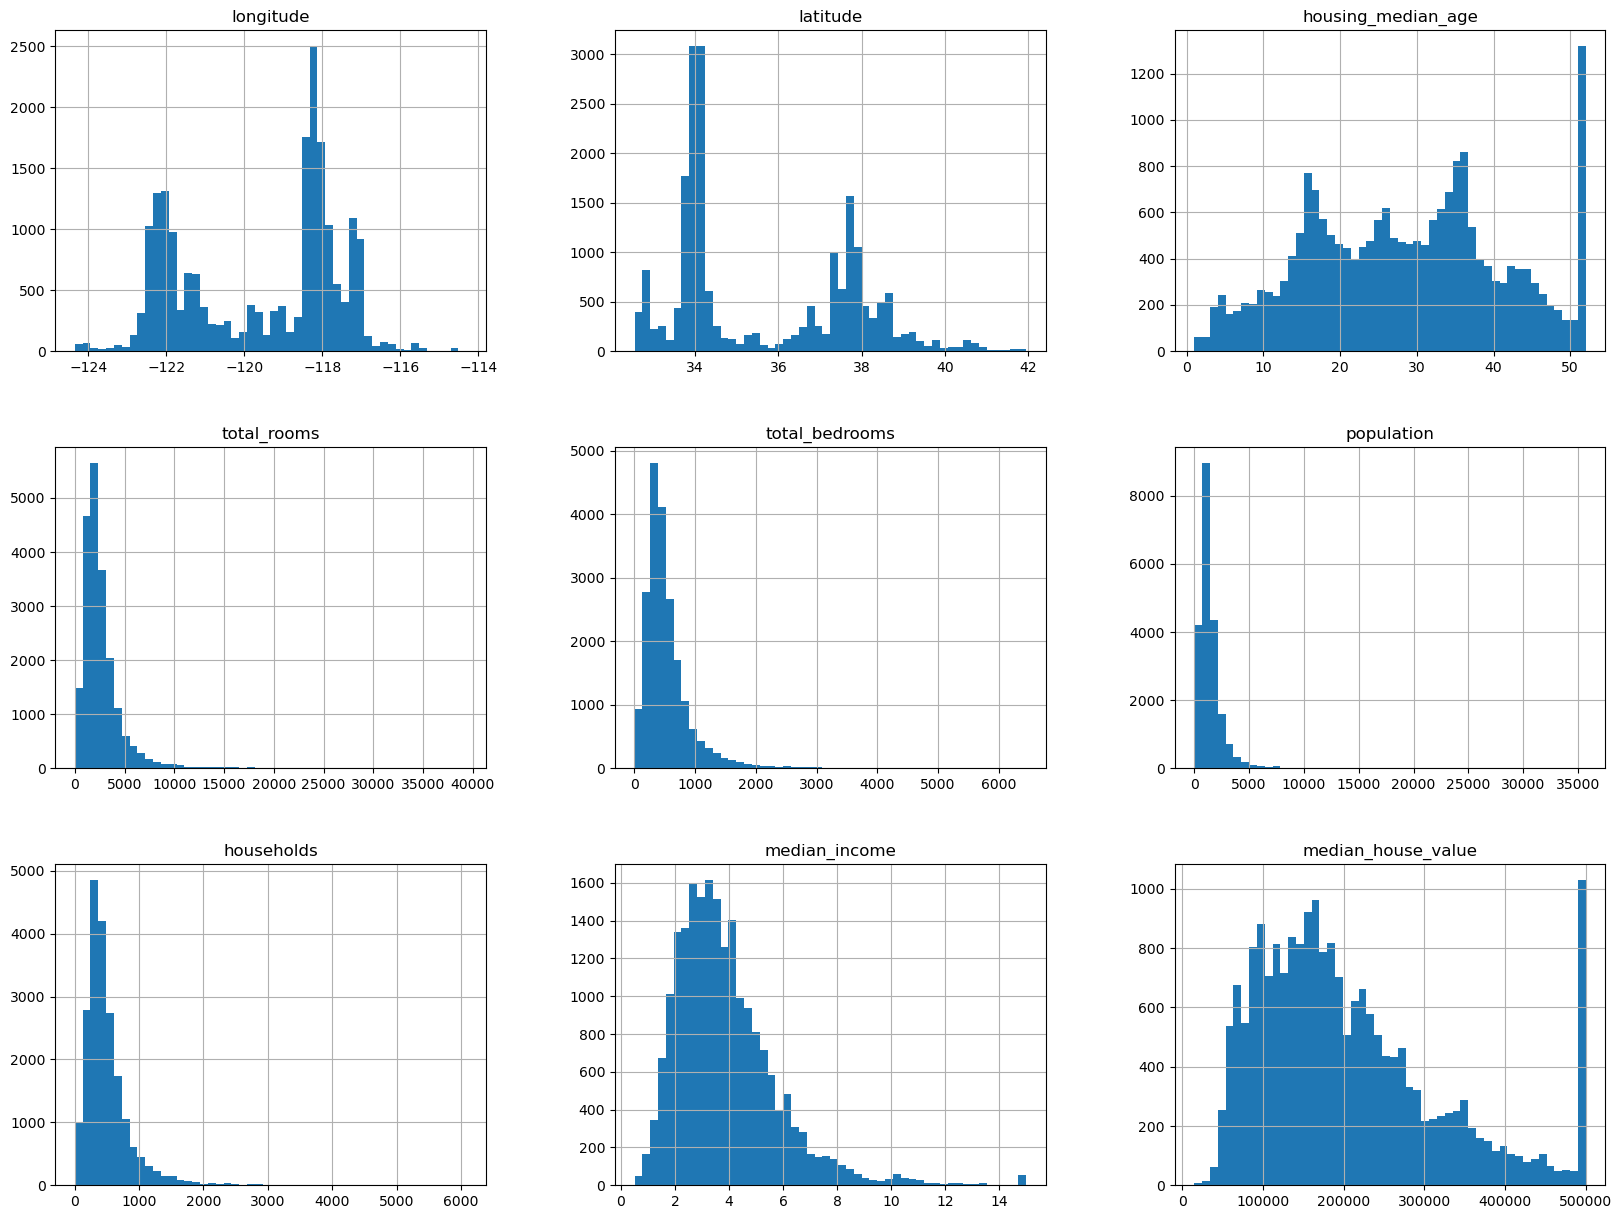

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
    
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
 return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
 ## np.int64(identifier) --> first we standardize the identifier format into 64-bit representation. Because Python’s int type can behave slightly differently across versions and systems.
 ## then we pass it to the hash function through hash, the output is a hexadecimal string, for example: 202cb962ac59075b964b07152d234b70
 ## digest sections it into bytes by transforming it into raw binary form: \x2c\xb9b\xacY\x07[\x96K\x07\x15-#Kp
 ## [-1] takes the last byte
 ## < 256* test_ratio returns true if it's less than 51
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    # This is a default argument, if the user doesn't define a hash function, use hashlib.md5 by default
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    ## It’s just a name for the variable. The underscore is used to avoid conflict with Python’s built-in function id().
    return data.loc[~in_test_set], data.loc[in_test_set]
    ## ~ in Python means not. loc selects rows based on booleans. the first part of the 
    ## return statement, are records that are 'False' or 'not in test set, or in other words the training set
    ## the other part is the data that is 'True' or is in the test set

In [9]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [10]:
mean = housing["median_income"].mean()
median = housing["median_income"].median()
mode = housing["median_income"].mode()[0]  # if multimodal, this gets the first
iqr = housing["median_income"].quantile(0.75) - housing["median_income"].quantile(0.25)

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("IQR (middle 50% range):", iqr)

Mean: 3.8706710029069766
Median: 3.5347999999999997
Mode: 3.125
IQR (middle 50% range): 2.17985


# 🧠 Income Distribution Summary

## 📌 Measures of Central Tendency

- **Mean = 3.87** → The average income  
  > لو جمعنا الفلوس دي كلها وقسمناها على العائلات بالتساوي، كل عيلة هتاخد المبلغ ده  

- **Median = 3.53** → Half the data is below, half is above  
  > دة بيقسم الداتا بالنص، نص الداتا على يمينه والنص التاني على شماله  

- **Mode = 3.13** → Most common value  
  > أطول عمود في الـ histogram  
  > لو الداتا دي symmetric, الmean, mode, median هيكونوا على نفس الخط

---

## 📊 IQR (Interquartile Range)

- **IQR = Q3 - Q1 = 4.75 - 2.57 = 2.18**
- Represents the middle 50% of the data (where "most values live")
- If you shade the region from **2.57 to 4.75**, that’s the IQR band  
  > الحبة اللي فيهم أطول عواميد في الداتا

---

## 📈 Visual Insight

- The **mode** at ~3.13 suggests the **peak of the histogram** is near 3.
- The **mean > median > mode** implies the distribution is **right-skewed**, probably due to a few people with very high incomes.

> This matches the author's eyeball estimate of **2–5** as the range where most values are concentrated.


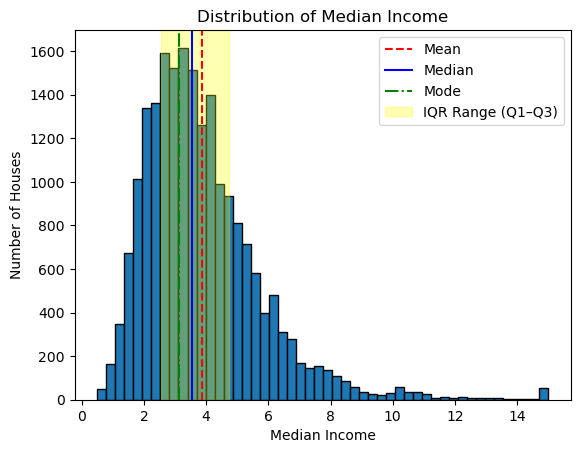

In [11]:
import matplotlib.pyplot as plt

plt.hist(housing["median_income"], bins=50, edgecolor='black')
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(median, color='blue', linestyle='-', label='Median')
plt.axvline(mode, color='green', linestyle='-.', label='Mode')
plt.axvspan(
    housing["median_income"].quantile(0.25),
    housing["median_income"].quantile(0.75),
    color='yellow', alpha=0.3, label='IQR Range (Q1–Q3)'
)
plt.legend()
plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Number of Houses")
plt.show()


# 📐 What is Skewness?

**Skewness** measures the **asymmetry** of a distribution.

- **Symmetric** → Left side ≈ Right side  
- **Positive (Right) Skewed** → Long tail on the right  
- **Negative (Left) Skewed** → Long tail on the left  

---

## 🧠 Rule of Thumb: Order of Mean, Median, Mode

| Skewness Type     | Order (from lowest to highest)     | Shape Insight                   |
|-------------------|-------------------------------------|----------------------------------|
| **Left Skew (−)** | Mean < Median < Mode               | Long tail on the **left**       |
| **Symmetric (0)** | Mean ≈ Median ≈ Mode               | Bell-shaped (like normal dist.) |
| **Right Skew (+)**| Mode < Median < Mean               | Long tail on the **right**      |

---

🔁 **Tip**: Think of the **mean** as the value that's most sensitive to outliers.

- In a **right-skewed** distribution (e.g., incomes), **extreme high values** will **pull the mean upward**.
- In a **left-skewed** distribution (e.g., test scores with penalties), **extreme low values** will **pull the mean downward**.


In [12]:
housing["median_income"].skew()

1.6466567021344465

# Interpretation:

> 0 → Symmetric

> more than 0 → Right-skewed

> less than 0 → Left-skewed

In [13]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

C:\Users\sherr\AppData\Local\Temp\ipykernel_105092\238931313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) ## 1 train test pair - test percentage - shuffling strategy
## split is an object of the StratifiedShuffleSplit class, it has a .split() method
for train_index, test_index in split.split(housing, housing["income_cat"]): ## since you set n_splits=1, it will loop once
    ## split.split is a generator that will output the indices of the train and test sets.
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
housing["income_cat"].value_counts() / len(housing) * 100 

income_cat
3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: count, dtype: float64

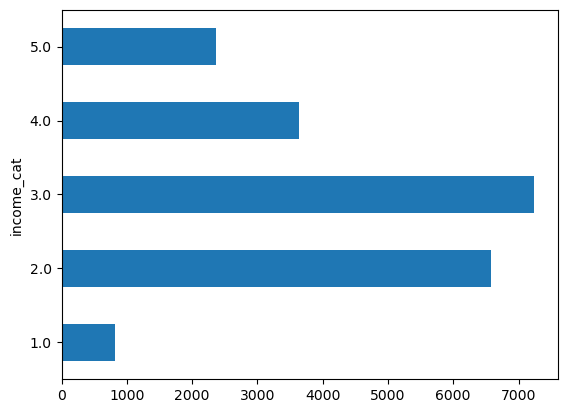

In [16]:
import matplotlib.pyplot as plt

housing["income_cat"].value_counts().sort_index().plot(kind="barh")
plt.show()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np

# Step 1: Create the income_cat column (if not already present)
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Step 2: Do random sampling (normal train_test_split)
from sklearn.model_selection import train_test_split
train_set_rand, test_set_rand = train_test_split(housing, test_size=0.2, random_state=42)

# Step 3: Do stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Step 4: Compute proportions
def income_cat_proportions(data):
    return data["income_cat"].value_counts(normalize=True).sort_index()

overall_props = income_cat_proportions(housing)
rand_props = income_cat_proportions(test_set_rand)
strat_props = income_cat_proportions(strat_test_set)

# Step 5: Compare and calculate %error
comparison_df = pd.DataFrame({
    "Overall": overall_props,
    "Random": rand_props,
    "Stratified": strat_props,
    "Rand. %error": 100 * (rand_props - overall_props) / overall_props,
    "Strat. %error": 100 * (strat_props - overall_props) / overall_props
})

print(comparison_df)


             Overall    Random  Stratified  Rand. %error  Strat. %error
income_cat                                                             
1           0.039826  0.040213    0.039971      0.973236       0.364964
2           0.318847  0.324370    0.318798      1.732260      -0.015195
3           0.350581  0.358527    0.350533      2.266446      -0.013820
4           0.176308  0.167393    0.176357     -5.056334       0.027480
5           0.114438  0.109496    0.114341     -4.318374      -0.084674


In [18]:
for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)

In [19]:
housing2 = strat_train_set.copy()

In [20]:
import folium
from folium.plugins import HeatMap

# Center the map around California
m = folium.Map(location=[37, -119], zoom_start=6)

# Extract lat/lon points
heat_data = [[row["latitude"], row["longitude"]] for index, row in housing2.iterrows()]

HeatMap(heat_data).add_to(m)

m  # if you're in Jupyter, this will display the map


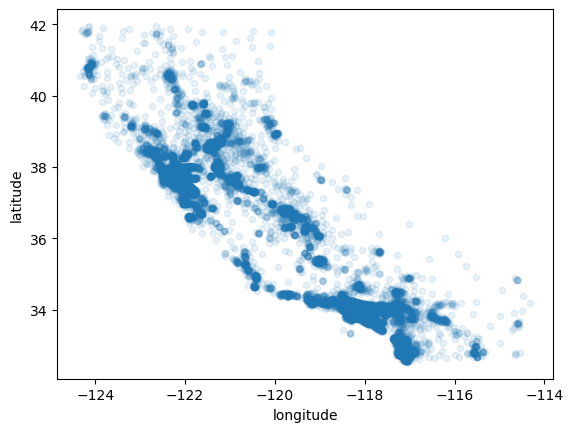

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()


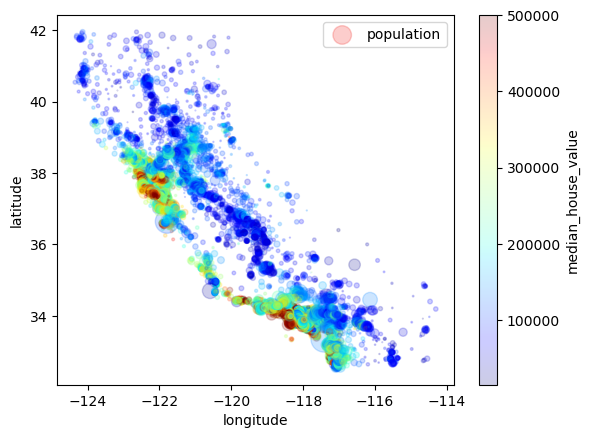

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()
## raduis = s حجم الدايرة هو  عدد الناس
## color = c لون الدايرة هو السعر

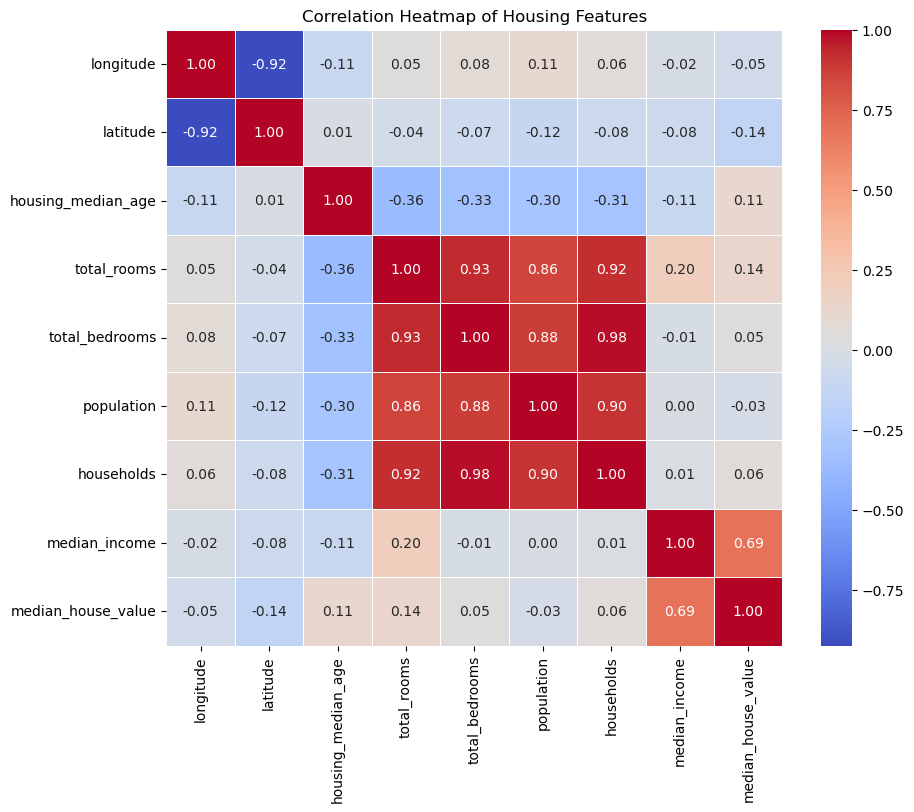

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = housing2.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Housing Features")
plt.show()

## Notice that this measures linear correlation only, there may be other kind of correlation that goes undetected


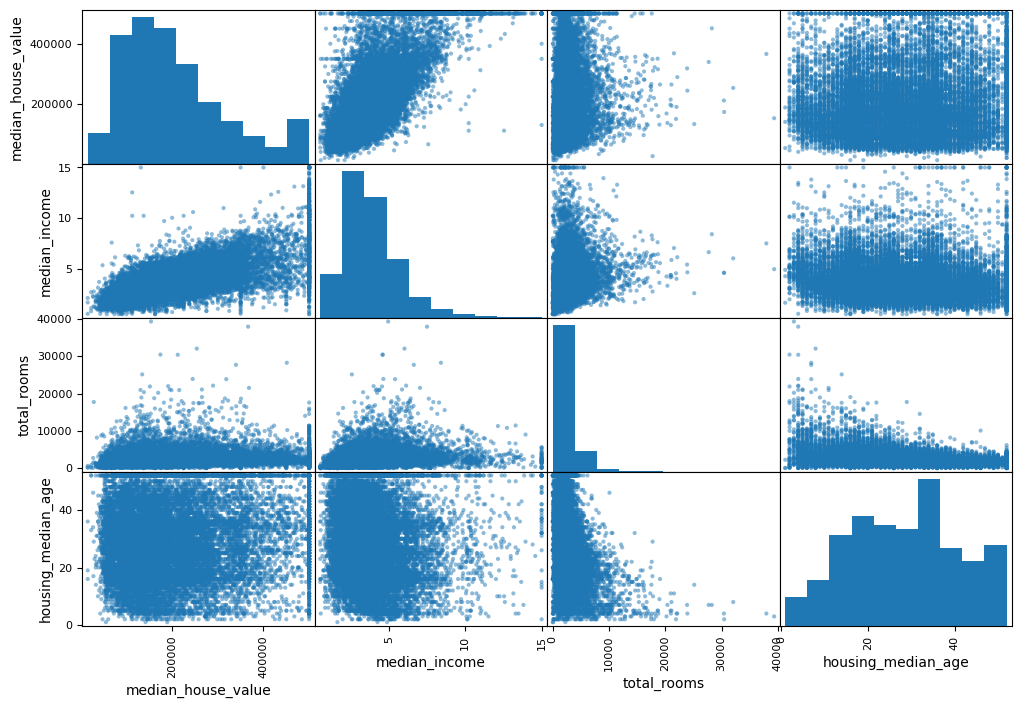

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing2[attributes], figsize=(12, 8))
plt.show()

# 📊 Exploratory Data Analysis: California Housing Dataset

This pairplot visualization presents relationships among four key variables:

- `median_house_value`
- `median_income`
- `total_rooms`
- `housing_median_age`

---

## 🔍 Key Insights

### 1. 💰 Income vs. House Value
- There is a clear **positive correlation** between `median_income` and `median_house_value`.
- As income increases, house value tends to increase.
- The relationship appears nonlinear and capped around the \$500,000 mark, possibly due to data truncation or a cap in the dataset.

### 2. 🏠 Total Rooms vs. House Value
- `total_rooms` has a **very weak or no clear correlation** with `median_house_value`.
- High room counts do not necessarily equate to high house values.
- There’s significant variance and clustering at lower values.

### 3. 🏡 Housing Age vs. House Value
- `housing_median_age` shows **no clear correlation** with `median_house_value`.
- Houses of all ages have a wide spread of values.
- Possible explanation: location and condition may matter more than age.

### 4. 🧮 Income vs. Total Rooms
- Slight positive trend: higher-income areas tend to have more rooms.
- But again, high dispersion suggests this isn't a strong linear relationship.

### 5. 🕰 Age vs. Total Rooms & Income
- No significant patterns between `housing_median_age` and other variables.
- Suggests that older and newer houses can exist in areas with varying income levels and room counts.

---

## 🧠 Summary

- **Median income** is the strongest predictor of **house value** among these variables.
- **Total rooms** and **housing age** show limited predictive power on their own.
- The distribution plots indicate skewness in `total_rooms` and `median_income`, which might require normalization or transformation for modeling.

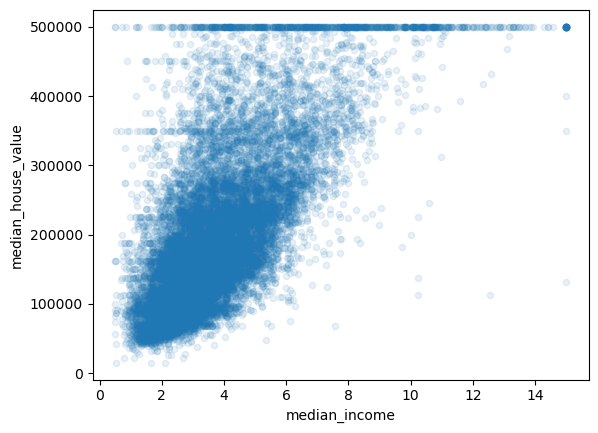

In [25]:
housing2.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)
plt.show()

## 📈 Why Are There Horizontal Lines in the Scatter Plot?

This scatter plot shows the relationship between `median_income` and `median_house_value`.

### 🧠 So... what do those horizontal lines mean?

The horizontal lines at the top of the plot — especially the **thick one at \$500,000** — indicate that:

- **House values have been capped** at \$500,000 in the dataset.
- Multiple entries have exactly the same `median_house_value`, creating a "pile-up" at that price point.
- This is why you see a *solid horizontal bar* — many data points overlap at that capped value.

### 🔎 Why does this matter?

- This **data truncation** can distort analysis and modeling.
- It might:
  - Hide true relationships in higher-income areas.
  - Mislead regression models (e.g., underestimating the value in affluent areas).
- Consider treating this cap carefully:
  - Add a flag for "capped" data.
  - Impute or model these separately if appropriate.

> 💡 TL;DR: The horizontal lines = **lots of homes priced exactly at \$500,000**, likely because it's the upper limit recorded in the dataset.


In [26]:
cap_value = 500000
capped_count = (housing2['median_house_value'] == cap_value).sum()
print(f"Number of capped house values at ${cap_value}: {capped_count}")

Number of capped house values at $500000: 23


In [27]:
close_to_cap = housing2[housing2['median_house_value'] >= 490000]
print(close_to_cap['median_house_value'].value_counts().sort_index())

median_house_value
490000.0      1
490300.0      1
490400.0      1
490800.0      2
491200.0      2
492000.0      1
492200.0      1
492500.0      2
493000.0      1
493300.0      1
493400.0      1
493800.0      1
494000.0      1
494400.0      1
494700.0      1
495400.0      1
495500.0      3
495600.0      1
495800.0      1
496400.0      2
497400.0      1
497600.0      1
498400.0      1
498600.0      1
498700.0      1
498800.0      1
499000.0      1
499100.0      1
500000.0     23
500001.0    786
Name: count, dtype: int64


In [28]:
housing2["rooms_per_household"] = housing2["total_rooms"]/housing2["households"]
housing2["bedrooms_per_room"] = housing2["total_bedrooms"]/housing2["total_rooms"]
housing2["population_per_household"] = housing2["population"]/housing2["households"]

housing2 = housing2.drop(columns={'total_rooms','total_bedrooms'},axis=1)

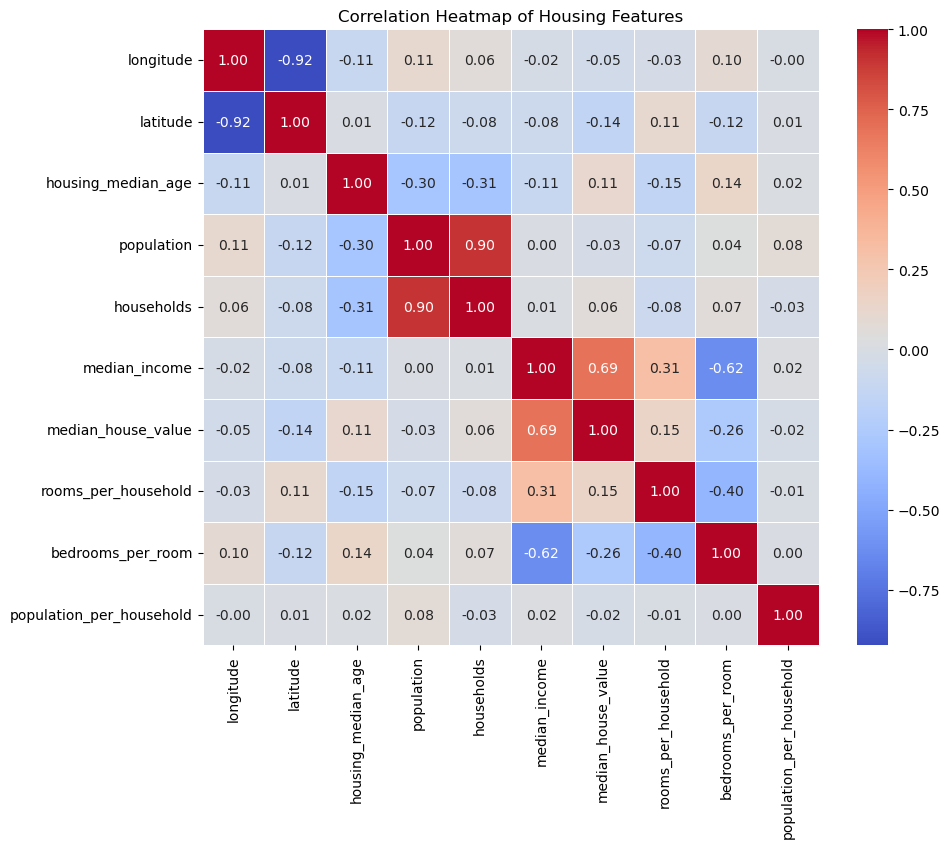

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = housing2.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Housing Features")
plt.show()

# Correlation Comparison After Feature Engineering
![](plot.png)

# Data Cleaning

In [30]:
#separating the predictor from the training set 
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Drop the categorical column since Imputer works only on numeric data
housing_num = housing.drop("ocean_proximity", axis=1)

# Create and fit the imputer (strategy = median), we cannot be sure that there won’t be any missing values in new data after
#the system goes live, so it is safer to apply the imputer to all the numerical attributes:
imputer = SimpleImputer(strategy="median").fit(housing_num)

# Wrap results in a DataFrame for readability
imputer_stats = pd.DataFrame(
    imputer.statistics_,
    index=housing_num.columns,
    columns=['median']
)

print(imputer_stats)


                        median
longitude           -118.51000
latitude              34.26000
housing_median_age    29.00000
total_rooms         2119.00000
total_bedrooms       433.00000
population          1164.00000
households           408.00000
median_income          3.54155


# How Median Selection Algorithms Work (Example)

Let’s find the median of this small dataset without fully sorting:


The true median (after sorting: `1, 2, 4, 7, 9`) is **4**.

---

## 🔹 QuickSelect Idea
QuickSelect is like QuickSort but instead of fully sorting, it only looks at the side of the array where the median must be.

---

### Step 1: Pick a pivot
Choose `7` as the pivot.

- Smaller: `[2, 4, 1]`  
- Bigger: `[9]`  
- Pivot: `7`

There are **3 elements smaller** than 7.  
For 5 total numbers, the median is at index `k=2` (0-based).  
Since `3 > 2`, the median is in the **smaller side**.

---

### Step 2: Recurse on smaller side `[2, 4, 1]`
Choose pivot = `2`.

- Smaller: `[1]`  
- Bigger: `[4]`  
- Pivot: `2`

Now the “smaller” side has 1 element, and the pivot is in position 1 (0-based).  
Depending on pivot choices, the algorithm will keep partitioning until it finds the correct element (`4` in this case).

---

## 🔹 Key Takeaways
- You **don’t sort the whole array**.  
- Instead, you repeatedly **partition** until you land on the middle element.  
- Complexity: about **O(n)** comparisons on average, instead of O(n log n) for a full sort.

---

## 🔹 Even vs Odd Case
- With **odd** counts (5 numbers), the median is the single middle value.  
- With **even** counts (e.g. 6 numbers), the median is the **average of the two middle values**.


In [33]:
X = imputer.transform(housing_num)

# What Does `X` Look Like After Imputation?

Let’s imagine a small sample of the `housing_num` DataFrame:

| longitude | latitude | housing_median_age | total_rooms | median_income |
|-----------|----------|---------------------|-------------|---------------|
| -122.05   | 37.37    | 27                  | 3885        | 8.3252        |
| -118.30   | 34.26    | NaN                 | 1510        | 3.5850        |
| -119.61   | 36.31    | 15                  | NaN         | 2.2345        |

Notice there are **missing values** (`NaN`) in `housing_median_age` and `total_rooms`.

---

## Step 1: Apply the Imputer
```python
X = imputer.transform(housing_num)
array([[-122.05,  37.37, 27. , 3885. , 8.3252],
       [-118.30,  34.26, 28. , 1510. , 3.5850],
       [-119.61,  36.31, 15. , 2100. , 2.2345]])


In [ ]:
housing_imputed = pd.DataFrame(X, columns=housing_num.columns)

Step 3: Restore DataFrame

To get back a labeled DataFrame:


Now you have the same structure as before, but with no missing values.

| longitude | latitude | housing_median_age | total_rooms | median_income |
|-----------|----------|---------------------|-------------|---------------|
| -122.05   | 37.37    | 27                  | 3885        | 8.3252        |
| -118.30   | 34.26    | 28                 | 1510        | 3.5850        |
| -119.61   | 36.31    | 15                  | 2100         | 2.2345        |

# Handling Text and Categorical Attributes

In [34]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

array([1, 4, 1, ..., 0, 0, 1])

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]

housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

# One issue with this representation is that ML algorithms will assume that two nearby
# values are more similar than two distant values. Obviously this is not the case (for
# example, categories 0 and 4 are more similar than categories 0 and 1). To fix this
# issue, a common solution is to create one binary attribute per category: one attribute
# equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute
# equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is
# called one-hot encoding, because only one attribute will be equal to 1 (hot), while the
# others will be 0 (cold).

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

# Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very
# useful when you have categorical attributes with thousands of categories. After onehot encoding we get a matrix with thousands of columns, and the matrix is full of
# zeros except for one 1 per row. Using up tons of memory mostly to store zeros would
# be very wasteful, so instead a sparse matrix only stores the location of the nonzero
# elements. You can use it mostly like a normal 2D array,19 but if you really want to con‐
# vert it to a (dense) NumPy array, just call the toarray() method

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

## Custom Transformers

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('label_binarizer', LabelBinarizer()),
])
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [1]:
import numpy as np
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

NameError: name 'full_pipeline' is not defined